# Homework 05
## Brown University
## DATA 1010
## Fall 2020

## Problem 1

Use the inverse CDF trick to sample from the probability measure whose density function is $f(x) = 2xe^{-x^2} \mathbf{1}_{x \geq 0}$. You can take as given a random number generator which samples from $\mathrm{Uniform}(0, 1)$. Explain your answer mathematically, and confirm that it works empirically by implementing your solution in code.

In [1]:
using Pkg; Pkg.activate(".")

 Activating environment at `~/Graduate/Data-1010/problem-sets/homework/hw05/Project.toml`


$F(x) = 1 - e^{-x^{2}}$ This function has its range [0,1] and domain [0,1]. $F^{-1}(x) = -log(1-u)^{-\frac{1}{2}}$. If we sample Y from uniform distribution on [0,1], and input it into $F^{-1}(x)$, we get the distribution of x since $F^{-1}(x)$ follows uniform distriution on [0,1].

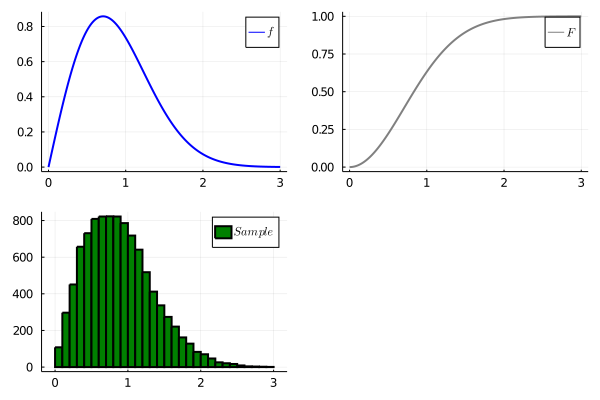

In [29]:
using Plots, Distributions, LaTeXStrings, Statistics, SymPy
f(x) = 2*x*exp(-x^2)
F(x) = 1 - exp(-x^2)
Finv(x) = sqrt(-log(1-x))
cdfplot = plot(0:0.01:3, F, label = L"F", color = "gray", linewidth = 2.0)
pdfplot = plot(0:0.01:3, f, label = L"f", color = "blue", linewidth = 2.0)
U = rand(Uniform(0, 1))
Us = [rand(Uniform(0, 1)) for _ in 1:10000]
ys = [Finv(u) for u in Us]
sampleplot = histogram(Us, ys, label = L"Sample", color = "green", linewidth = 2.0)
plot(pdfplot, cdfplot, sampleplot)

## Problem 2

In this problem, we'll discover a concrete connection between the probabilistic notion of correlation and the mental picture you might have of correlation which involves a line cutting through some representation of the joint distribution.

*Note: I highly recommend working this one out following the hints rather than trying to look up anything online. Every source I could find does this problem from a statistical point of view, working with $n$ observations, rather than a probabilistic point of view, working directly from the joint distribution. This method is more straightforward and offers more insight, since it shows how the connection does not actually depend on the statistical context.*

Recall that the correlation between two variables is defined by
$$
\rho = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}. 
$$

(a) Consider two real-valued, non-constant random variables $X$ and $Y$. Find the line in the plane which minimizes the expected squared vertical distance from a point selected from the joint distribution of $X$ and $Y$ to the line. Relate the slope of this line to the correlation $\rho$ and the standard deviations $\sigma_X$ and $\sigma_Y$. 

*Hint 1: Represent the line as $y = mx + b$ and write an expression for the vertical distance from the point $(X,Y)$ to the line. Take the expectation of that expression (which makes sense because $X$ and $Y$ are random variables).* 

*Hint 2: Use your multivariable calculus knowledge to find the values of $m$ and $b$ which minimize this expression. Note that expectations involving $X$ and $Y$ are constant with respect to the optimization over $m$ and $b$. It works out that the resulting system of equations is solvable by hand and only has one solution.*

(b) Verify this on a few random examples of a bivariate Gaussians with nonzero correlation. Plot the density function or mass function as well as the line which minimizes probability-mass-weighted the sum of squared vertical distances to the line.

*Note: You can generate a random positive semidefinite matrix $\Sigma$ by generating a random matrix $A$ and setting $\Sigma = AA'$.*

(c) In part (b), the graph you get might look a bit surprising. Describe what you would need to do with a $2 \times 2$ matrix $\Sigma$ if you wanted to find the directions of the major and minor axes of the ellipses which are the level sets of the multivariate Gaussian with covariance matrix $\Sigma$. 

*Hint: you want to split this problem into two parts: (i) find the major and minor axes of the ellipse obtained by applying the linear transformation $A$ to the unit circle, and (ii) compute an appropriate transformation $A$ so that the desired vector is $AZ + \mu$, where $A$ is a standard multivariate Gaussian. Note that each of these parts were done in class.*

(solution a)  
For point (X, Y), the squared vertical distance between regression line and point is $(mX+b-Y)^2$

$E((mX+b-Y)^2)$ = $m^2E(x^2) + b^2 + E(Y^2) + 2mbE(X) -2bE(Y) - 2mE(XY)$ 

The gradient is $[2mE(X^2] + 2bE(X) - 2E(XY), 2b - 2mE(X) - 2E(Y)$

To minimize, we get $m = \frac{E(XY) - bE(X)}{E(X^2)}$ and $b = - mE(X) + E(Y)$

Putting value of b into m, $m = \frac{E(XY - E(X)E(Y)}{E(X^2)-E(X)^2} = \frac{Cov(X,Y)}{Var(X)}$

Puting the value of m into b, $b = E(Y) - \frac{Cov(X,Y)E(X)}{Var(X)}$

Since $\rho = \frac{\mathrm{Cov}(X, Y)}{\sigma_X \sigma_Y}$, the slope $m = \frac{\rho*\sigma_X}{\sigma_Y}$

(solution b) We use multivariable normal to sample points on randomly picked $\mu_x, \mu_y$ and Covariance Matrix of x and y

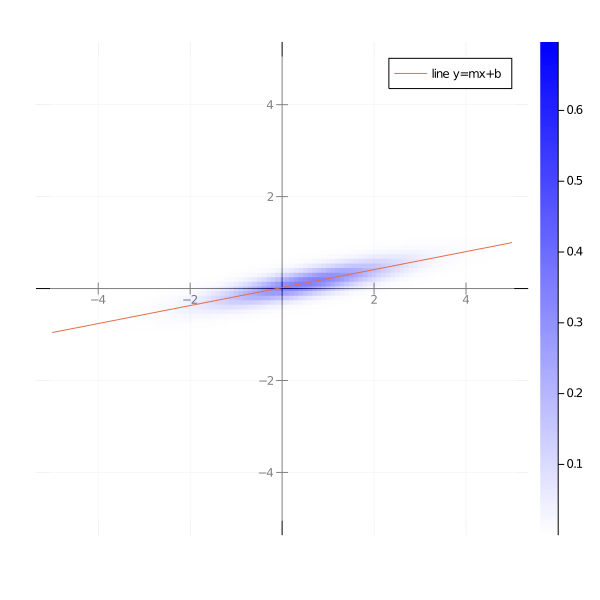

In [54]:
using Distributions, Plots, Random, LinearAlgebra
Random.seed!(6)
Ex = rand(1)[1]
Ey = rand(1)[1]
tmp = rand(2,2)
covMatrix = tmp * tmp'
m = covMatrix[2] / covMatrix[1]
b = Ey - Ex * m
line(x) = m*x +b
d = MvNormal([Ex,Ey], covMatrix)
heatmap(-5:0.1:5, -5:0.1:5, (x,y)->pdf(d,[x,y]),ratio=1, size = (600,600), frame=:origin, fillalpha=0.5, color=cgrad([:white, :Blue]))
plot!(-5:0.1:5, x->line(x), label = "line y=mx+b")

(solution c) The covariance of $AZ+μ$ is $E[(AZ)(AZ)′]=AE[ZZ′]A′=AIA′=AA′$. Therefore, we want to find a matrix A such that AA′=Σ. Let A be the square root of Σ, since the square root of a symmetric matrix is symmetric. Taking the svd decomposition will let us know how to transform the original coordinate to the coordinates described by the ellipse. Taking the sigular value matrix, which are the eigenvalues, and left matrix, which are the eigenvectors, we get the major and minor direction of changes, which are the major and minor axes.

In [65]:
Random.seed!(6)
tmp = rand(2,2)
covMatrix = tmp * tmp'
s,v,d = svd(sqrt(covMatrix))
maj = s[:,1]*v[1]
minor = s[:,2]*v[2]
println("Major:", maj)
println("Minor:", minor)
# s2,v2,d2 = svd(covMatrix)
# maj2 = s2[:,1]*v2[1]
# minor2 = s2[:,2]*v2[2]
# println("Major2:", maj2)
# println("Minor2:", minor2)

Major:[-0.975228293193219, -0.08684871187453554]
Minor:[-0.007908039321748547, 0.08879974755866167]


# Problem 3 

In class we discussed a connection between the exponential distribution and the gaps between points which are randomly sprinkled on the number line. In this problem, we'll make that more concrete. Let's use the context of calls arriving at a fire department.

(a) Suppose that at each second there's a 1/100 chance of a call arriving that second (suppose for simplicity that calls don't arrive in the same second). How many calls arrive in an hour? Express the answer exactly as a named distribution, and also state another named distribution which approximately describes this random in a way that's more practically useful.

(b) Simulate this experiment many times, and plot a histogram of all of the lengths of the time intervals between calls. For example, if a call arrived at the 10-minute mark, then another at the 20-minute mark, and then another at the 50-minute mark, then the time intervals would be 10 and 30 minutes. 

(c) Consider the random interval between consecutive calls which contains the hour's 30-minute mark. What's the distribution of this random variable? Answer by using a simulation to make a histogram, and answer analytically as well only if you wish. 

(d) Let's change the model. Suppose that there are 36 people who are going to call in that hour, and each one chooses independently from the others, and uniformly at random from the available 3600 seconds, at which second they're going to call. Repeat part (b); do you get noticably different results? Consider musing on why it might make sense that this would be the case.

(solution a) The distribution should be Bionomial distribution. The number of calls arriving in an hour will be 
the $Bionomial(n=3600, p=\frac{1}{100})$. We often use Poisson distribution to approximate Bionomial distribution with $\lambda=np$ when n -> infinity and p -> 0.

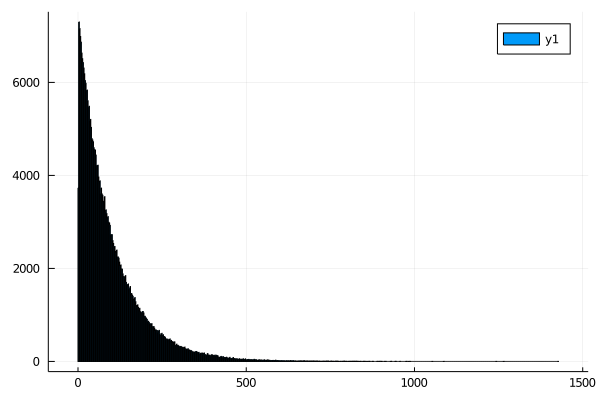

In [7]:
#(solution b)
using Distributions, Plots
function simulate()
    intervals = []
    last_time = 0
    for i = 1:3600
        r = rand(Uniform(0,1))
        if r < 0.01
            push!(intervals, i - last_time)
            last_time = i
        end
    end
    return intervals
end
res = []
for i in 1:10000
    res = [res; simulate()]
end
histogram(res,bins=1000)

(solution c)

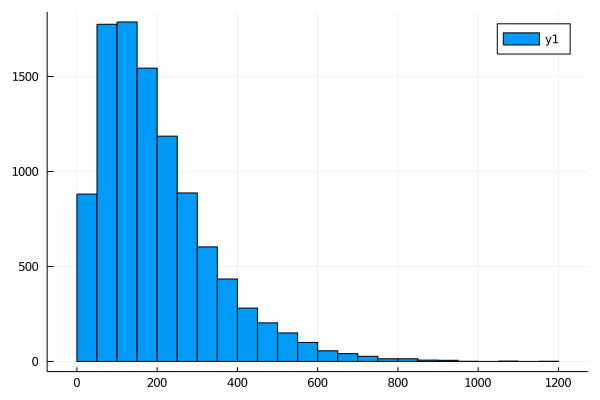

In [9]:
using Distributions, Plots
function simulate()
    intervals = []
    time = 0
    index = 0
    for i = 1:3600
        if i == 1800
            index = length(intervals) + 1
        end
        r = rand(Uniform(0,1))
        time +=1
        if r <= 0.01
            push!(intervals, time)
            time = 0
        end
    end
    return intervals[index]
end
res = []
for i in 1:10000
    x = simulate()
    push!(res, x)
end
histogram(res, bins=30)

(solution d) d is same as the b. Since 36 people are going to call in this hour independently, which means that each of them will call at second i with chance $\frac{1}{3600}$. 36 people, under the condition that they will not call at the same time, a phone call at second i will have the chance 0.01, which is same as the probability in b.

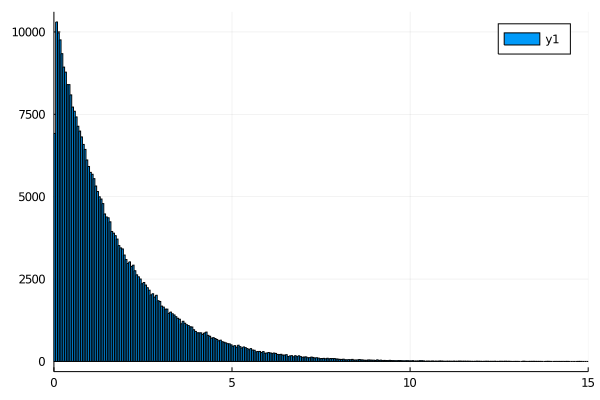

In [19]:
using Distributions, Plots, Random
seconds = zeros(3600)
seconds[1:36] .= 1
function simulate()
    intervals = []
    seq = shuffle(seconds)
    last = -1
    count = 1
    for i = 1:3600
        if seq[i] == 1
            if last == -1
                last = 1
            else
                push!(intervals, count / 60)
            end
            count = 1
        else
            count += 1
        end
    end
    return intervals
end
res = []
for _ in 1:10000
    res = [res; simulate()]
end
histogram(res,xlim=(0,15))

## Problem 4

The integral of a positive-valued function $f$ defined on $[a,b]$ can be defined as the area between the four curves $x = a, x = b, y = 0,$ and $y = f(x)$.

One way of estimating an area is by using random sampling: Suppose we would like to estimate the value of $\int_0^1 x^2 dx$. We sample uniformly at random from the unit square $\{0 \leq x, y \leq 1\}$, and count the proportion of sampled points satisfy the equation $y \leq x^2$. The more observations sampled, the closer this proportion gets to $\int_0^1 x^2 dx$.

(a) Implement the method described above, and compare your results with the mathematical integral value to check that this method is in fact correct. Please explain why this method makes sense.

(b) Using the method above (with a different function), estimate the value of $\pi$.

(solution a) In the last homework, we proved that rand a point in a unit squre is the same as rand 2 number independently from uniform distribution on [0,1]. From the integral, we know that $\int_0^1 x^2 dx = \frac{1}{3}$. The sample result we get is 0.33593, which is very close to the mathematical result. In this problem, we assume that the sample points will uniformly cover the unit square. If we only take the points under the y=x^2, we get the points that the cover the area in this integration, by calculating the proportion, we get the area because we know the area of the unit square.

In [1]:
using Distributions, Plots
function sample(n = 100000)
    cnt = 0
    for _ in 1:n
        x = rand(Uniform(0, 1))
        y = rand(Uniform(0, 1))
        if y <= x^2
            cnt +=1
        end
    end
    return cnt/n
end
sample()

0.33212

In [161]:
#(solution b)
using Distributions
function sample_pi(n = 100000)
    # Checking if (x, y) lies inside the circle
    circle_points = 0
    for _ in 1:n
        rand_x= rand(Uniform(-1,1))
        rand_y= rand(Uniform(-1,1)) 
  
        # Distance between (x, y) from the origin 
        origin_dist = rand_x^2 + rand_y^2
        if origin_dist <= 1
            circle_points += 1
        end
    end

    # Estimating value of pi, 
    # pi= 4*(no. of points generated inside the  
    # circle)/ (no. of points generated inside the square) 
    pi = 4* circle_points/ n
end
sample_pi()

3.14256

## Problem 5

(a) Simulate $n=1000$ observations from the joint distribution of $X$ and $Y$, given that $X$ is uniform on $[0,1]$ and $Y=2+1.2X+ϵ$, where $ϵ∼\mathbf{N}(0,0.5)$. Record the integrated squared error for the Nadaraya-Watson estimator (with bandwidth selected by *direct* cross-validation, so you're going to minimize the average over all left-out points of the squared error at the left-out point for the leave-one-out regression estimator) and for the line of best fit. 

(b) Do some simulations for a reasonably wide range of values for $n$ and compute the optimal $\lambda$ for each one. Plot the result; is it somewhat reminiscent of the part Stone's theorem which specifies the asymptotic behavior of the optimal $\lambda$ value?

*Note: you'll have to write code for simulating from the joint distribution of $X$ and $Y$ and for the cross-validation, but the other aspects of Nadaraya-Watson estimation you can draw pretty substantially from Data Gymnasia.*

（solution a)

0.3050298262247531


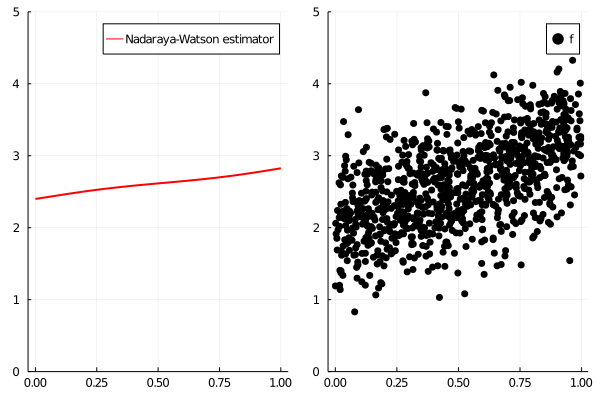

In [13]:
using LaTeXStrings, Random, Distributions; Random.seed!(123)
using LinearAlgebra, Statistics, Plots
function simulation(n=1000)
    sample = []
    xs = []
    for _ in 1:n
        x = rand(Uniform(0,1))
        push!(xs,x)
    end
    xs = sort(xs)
    for x in xs
        e = rand(Normal(0, 0.5))
        y = 2 + 1.2*x + e
        push!(sample, (x,y))
    end
    return sample
end
tricube(x) = abs(x) ≤ 1 ? 70/81 * (1-abs(x)^3)^3 : 0
tricube(λ, x) = tricube(x/λ)/λ
res = simulation()
λ = 1.0
r(λ, x) = sum(tricube(λ,x-Xi)*Yi for (Xi,Yi) in res)/sum(tricube(λ,x-Xi) for (Xi,Yi) in res)
nwe = plot(0:0.001:1, x->r(λ,x), label = "Nadaraya-Watson estimator", ylim=(0,5), linewidth = 2, color = :Red)
ori = plot([x for (x,y) in res], [y for (x,y) in res], label = "f", ylim=(0,5), linewidth = 2, color = :Black, seriestype=:scatter)
ISE_error = sum((r(λ, x)-y)^2 for (x, y) in res) * 0.001
println(ISE_error)
plot(nwe, ori)

In [23]:
using Optim
Random.seed!(123)
r(x) = 2 + 1.2x
function sampleXY()
    X = rand()
    Y = r(X) + sqrt(0.5)*randn()
    (X,Y)
end

n = 1000
samples = [sampleXY() for i=1:n]
xs = 0:1/2^8:1
ys = 0:1/2^5:6
D(u) = abs(u) < 1 ? 70/81*(1-abs(u)^3)^3 : 0 # tri-cube function
D(λ,u) = 1/λ*D(u/λ) # scaled tri-cube
K(λ,x,y) = D(λ,x) * D(λ,y) # kernel
kde(λ,x,y,samples) = sum(K(λ,x-Xi,y-Yi) for (Xi,Yi) in samples)/length(samples)

function kdeCV(λ,i,samples)
    x,y = samples[i]
    newsamples = copy(samples)
    deleteat!(newsamples,i)
    kde(λ,x,y,newsamples)
end

# first line approximates ∫f̂², the second line approximates -(2/n)∫f̂f
J(λ) = sum([kde(λ,x,y,samples)^2 for x=xs,y=ys])*step(xs)*step(ys) - 
     2/length(samples)*sum(kdeCV(λ,i,samples) for i=1:length(samples))
λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS()).minimizer[1]
r̂(λ,x) = sum(D(λ,x-Xi)*Yi for (Xi,Yi) in samples)/sum(D(λ,x-Xi) for (Xi,Yi) in samples)
using SymPy, LinearAlgebra
ISE_nonparametric = sum((r̂(λ_best_cv,x) - r(x))^2 for x in xs)

X = [ones(length(samples)) [x for (x,y) in samples]]
β = (X'*X) \ X' * [y for (x,y) in samples]
ISE_linear = sum((β⋅[1,x]-r(x))^2 for x in xs)

0.05151625872024022

(solution b)

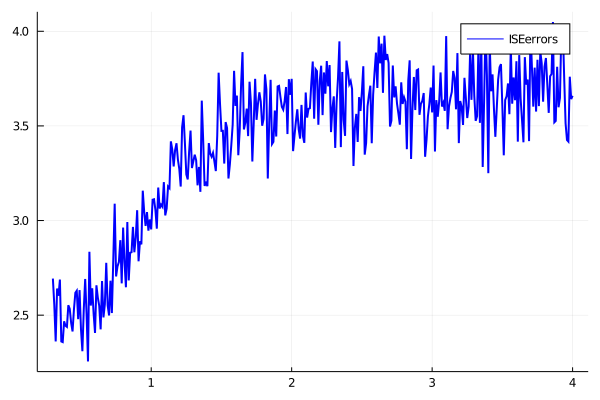

In [9]:
function pickl(ls, n=1000)
    es = []
    for λ in ls
        res = simulation(n)
        r(λ, x) = sum(tricube(λ,x-Xi)*Yi for (Xi,Yi) in res)/sum(tricube(λ,x-Xi) for (Xi,Yi) in res)
        ISE_error = sum((r(λ, x)-y)^2 for (x, y) in res) * 0.01
        push!(es, ISE_error)
    end
    return es
end
ls = [i for i = 0.3:0.01:4]
ISEs = pickl(ls)
ns = [for n in ]
plot(ls, ISEs, label = "ISEerrors", linewidth = 2, color = :Blue)

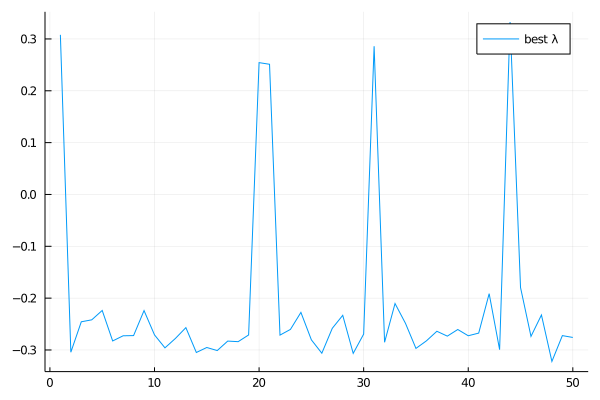

In [31]:
n = 1000
bestls = []
for _ in 1:20:n
    samples = [sampleXY() for i=1:n]
    xs = 0:1/2^8:1
    ys = 0:1/2^5:6
    J(λ) = sum([kde(λ,x,y,samples)^2 for x=xs,y=ys])*step(xs)*step(ys) - 
     2/length(samples)*sum(kdeCV(λ,i,samples) for i=1:length(samples))
    λ_best_cv = optimize(λ->J(first(λ)),[1.0],BFGS()).minimizer[1]
    push!(bestls, λ_best_cv)
end
plot(bestls, label="best λ")

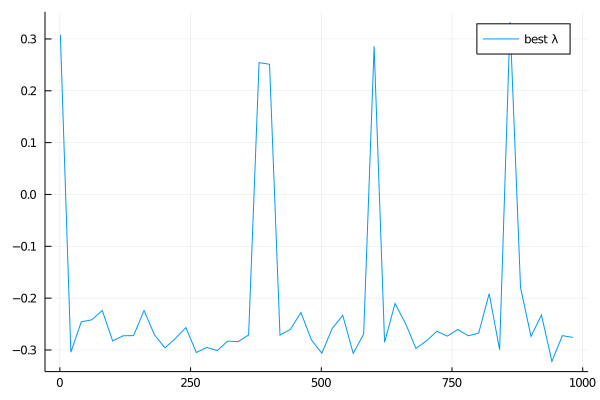

In [32]:
plot(1:20:n, bestls, label="best λ")